In [1]:
import pandas as pd
import numpy as np
import pycmap
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import os
import glob

## Calling in Hyperpro profile PAR

In [17]:
df = pd.read_csv('Gradients 4 - TN397 - Hyperpro Profiles.csv', usecols = ['kpar', 'flu', 'light_level', 'par_z', 'sal', 'dens', 'temp', 'time', 'lat', 'lon', 'depth'])
df

,time,lat,lon,depth,temp,sal,dens,flu,par_z,light_level,kpar
0,2021-11-24T21:18:28.000Z,19.64,-138.62,15,23.59,35.43,1024.16,NaN,389.04,26.56,0.14
1,2021-11-24T21:18:31.000Z,19.64,-138.62,16,23.59,35.44,1024.16,0.036,366.06,24.99,0.01
2,2021-11-24T21:18:33.000Z,19.64,-138.62,17,23.59,35.44,1024.17,0.036,389.53,26.60,-0.15
3,2021-11-24T21:18:36.000Z,19.64,-138.62,18,23.59,35.43,1024.17,0.031,468.90,32.02,0.07
4,2021-11-24T21:18:38.000Z,19.64,-138.62,19,23.58,35.42,1024.17,0.031,486.07,33.19,0.03
...,...,...,...,...,...,...,...,...,...,...,...
1035,2021-12-06T21:25:41.000Z,-2.50,-140.00,107,24.60,35.68,1024.44,0.332,3.26,0.63,0.01
1036,2021-12-06T21:25:43.000Z,-2.50,-140.00,108,24.51,35.74,1024.52,0.317,3.21,0.62,0.03
1037,2021-12-06T21:25:45.000Z,-2.50,-140.00,109,24.41,35.71,1024.53,0.309,3.14,0.61,0.07
1038,2021-12-06T21:25:47.000Z,-2.50,-140.00,110,24.23,35.70,1024.58,0.312,2.94,0.57,0.04


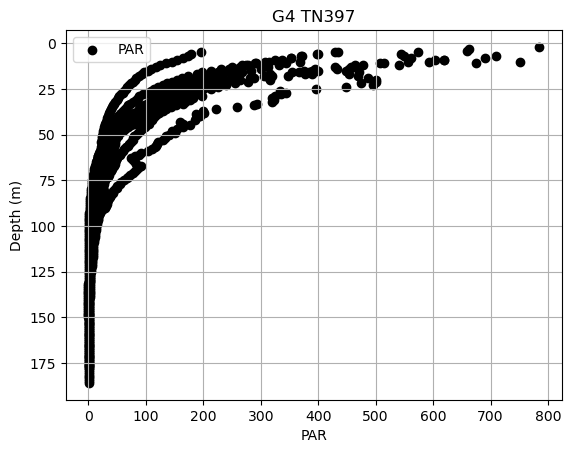

In [32]:
x = df['par_z']
y1 = df['depth']
y2 = df['temp']


plt.scatter(x, y1, c = 'k', label = 'PAR')
#plt.scatter(x, y2, c = 'blue', label = 'temp')

plt.xlabel("PAR")
plt.ylabel("Depth (m)")
plt.title("G4 TN397")
plt.legend()
plt.grid()
plt.gca().invert_yaxis()